**Global AI Hub and Koç Holding
Deep Learning Bootcamp**

In this section, after the preprocessing we did in the previous section *(GlobalAIHub_DL_UrbanSound8K_SpectrogramAndPreprocessing.ipynb)*, we will prepare and train the CNN model.

In [ ]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = np.load('/content/drive/MyDrive/urbansound/X_train.npy')
X_test = np.load('/content/drive/MyDrive/urbansound/X_test.npy')
X_val = np.load('/content/drive/MyDrive/urbansound/X_val.npy')
y_train = np.loadtxt("/content/drive/MyDrive/urbansound/y_train.txt" )
y_test = np.loadtxt("/content/drive/MyDrive/urbansound/y_test.txt")
y_val = np.loadtxt("/content/drive/MyDrive/urbansound/y_val.txt")

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
y_val=tf.keras.utils.to_categorical(y_val,10)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],64,64,1)
X_test = X_test.reshape(X_test.shape[0],64,64,1)
X_val = X_val.reshape(X_val.shape[0],64,64,1)

In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [ ]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [ ]:
results=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
55/55 [==============================] - 11s 28ms/step - loss: 2.0871 - accuracy: 0.2230 - val_loss: 1.7285 - val_accuracy: 0.4662
Epoch 2/100
55/55 [==============================] - 1s 19ms/step - loss: 1.7068 - accuracy: 0.3835 - val_loss: 1.3054 - val_accuracy: 0.5636
Epoch 3/100
55/55 [==============================] - 1s 19ms/step - loss: 1.4613 - accuracy: 0.4806 - val_loss: 1.0964 - val_accuracy: 0.6575
Epoch 4/100
55/55 [==============================] - 1s 19ms/step - loss: 1.2747 - accuracy: 0.5579 - val_loss: 1.0262 - val_accuracy: 0.6735
Epoch 5/100
55/55 [==============================] - 1s 19ms/step - loss: 1.1495 - accuracy: 0.6082 - val_loss: 0.8467 - val_accuracy: 0.7365
Epoch 6/100
55/55 [==============================] - 1s 19ms/step - loss: 1.0385 - accuracy: 0.6501 - val_loss: 0.7862 - val_accuracy: 0.7560
Epoch 7/100
55/55 [==============================] - 1s 19ms/step - loss: 0.9436 - accuracy: 0.6809 - val_loss: 0.7200 - val_accuracy: 0.7801
Epoch

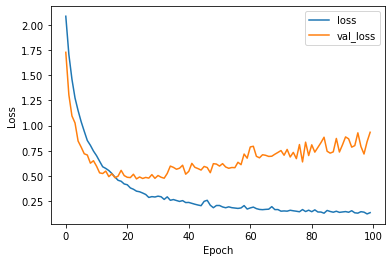

In [ ]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()



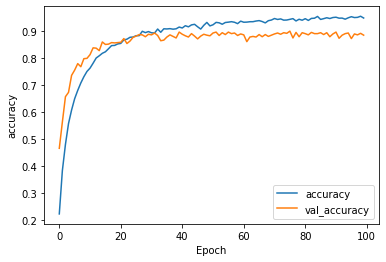

In [ ]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.9835 - accuracy: 0.8982


[0.983514130115509, 0.8981693387031555]

In [ ]:
prediction_result=model.predict(X_test[317].reshape(1,64,64,1))
prediction_result

array([[1.0821519e-17, 4.8188850e-14, 6.0233059e-09, 9.9999988e-01,
        9.7657065e-08, 3.8638551e-15, 1.1208491e-14, 9.8477279e-19,
        1.8887707e-13, 1.4519175e-14]], dtype=float32)

In [ ]:
predicted_class=prediction_result.argmax()
predicted_probability=prediction_result.max()


In [ ]:
print(f"Image class: {predicted_class} \n Prediction probability: {predicted_probability}")

Image class: 3 
 Prediction probability: 0.9999998807907104
